In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("kaggle_train.csv",parse_dates=['date'])

In [3]:
df.head()

,Unnamed: 0,date,store_nbr,sales,onpromotion,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,...,c_Cayambe,c_Cuenca,c_Ambato,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type
0,0,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
1,1,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
2,2,2013-01-01,25,2,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
3,3,2013-01-01,25,810,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
4,4,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [5]:
df.head()

,Unnamed: 0,date,store_nbr,sales,onpromotion,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,0,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013
1,1,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013
2,2,2013-01-01,25,2,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013
3,3,2013-01-01,25,810,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013
4,4,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013


In [6]:
df.drop(['Unnamed: 0','date','onpromotion'],1,inplace=True)

In [7]:
df.head()

,store_nbr,sales,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,2,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,810,1,0,93.14,770,0,1,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [8]:
def rmse(y_true,y_pred):
    return np.sqrt(np.square(np.subtract(y_true,y_pred)).mean())

In [9]:
def rsquared(y_true, y_pred):
    rss = np.sum(np.square((y_true- y_pred)))
    mean = np.mean(y_true)
    sst = np.sum(np.square(y_true-mean))
    r_square = 1 - (rss/sst)
    return r_square

In [10]:
performance=pd.DataFrame({"Model":[],
                         "RMSE Error":[],
                         "R squared value":[]})

In [11]:
def checknegative(predict):
    negative=False
    for i in predict:
        if i<0:
            negative=True
    if negative==True:
        print("negative values are present")
    else:
        print("no negative values are present")

In [12]:
def handlenegative(predict):
    pred=[]
    for i in predict:
        if i>0:
            pred.append(i)
        else:
            pred.append(0)
    print("negative values are handled successfully")
    return pred

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb=GaussianNB()

In [15]:
X=df.drop("sales",1)
y=df.sales

In [16]:
X_train=X[:-400000]
X_test=X[-400000:]
y_train=y[:-400000]
y_test=y[-400000:]

#we can also use below code
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=400000,random_state=0)

In [17]:
nb.fit(X_train,y_train)

GaussianNB()

In [18]:
y_predict=[]

In [19]:
bsize=4000
for batch in range(int(X_test.shape[0]/bsize)):
    y_predict.append(nb.predict(X_test[batch*bsize:(batch+1)*bsize]))

In [20]:
y_pred=[]

In [21]:
for i in y_predict:
    a=i.tolist()
    for j in a:
        y_pred.append(j)

In [22]:
checknegative(y_pred)

no negative values are present


In [23]:
import numpy as np

In [24]:
print("root mean squared error for testing dataframe: ",rmse(y_test,y_pred))

root mean squared error for testing dataframe:  5943.463227326093


In [25]:
print("r squared value: ",rsquared(y_test,y_pred))

r squared value:  -22.60692728314202


In [26]:
naivebayes={'Model': 'Naive Bayes Regressor', 'RMSE Error': rmse(y_test,y_pred), 'R squared value': rsquared(y_test,y_pred)}
performance = performance.append(naivebayes, ignore_index = True)

In [27]:
import matplotlib.pyplot as plt

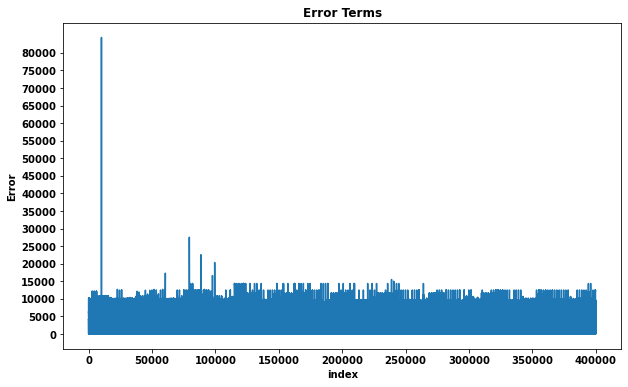

In [28]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,abs(y_test-y_pred))
plt.yticks(np.arange(0,max(y_test-y_pred),5000))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [29]:
import seaborn as sns

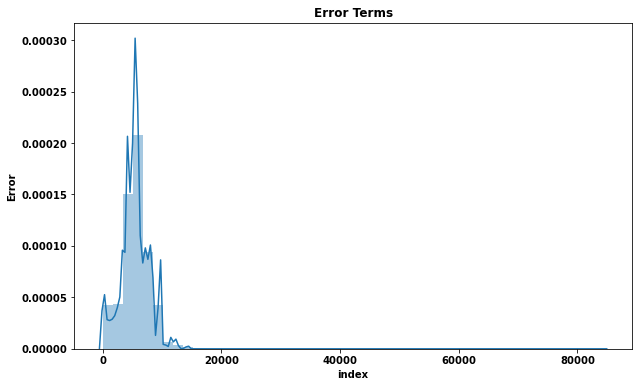

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [31]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred,
                   "error":abs(y_test-y_pred)})

In [32]:
new_df=pd.concat([X_test,error], axis=1)

In [33]:
new_df=new_df[new_df['error']<12000]

In [34]:
X=new_df.drop(['true y','prediction y','error'],1)

In [35]:
y=new_df['true y']

In [36]:
X_train=X[:-4000]
X_test=X[-4000:]
y_train=y[:-4000]
y_test=y[-4000:]

In [37]:
y_predict=[]

In [38]:
bsize=1000
for batch in range(int(X_test.shape[0]/bsize)):
    y_predict.append(nb.predict(X_test[batch*bsize:(batch+1)*bsize]))

In [39]:
y_pred=[]

In [40]:
checknegative(y_pred)

no negative values are present


In [41]:
for i in y_predict:
    a=i.tolist()
    for j in a:
        y_pred.append(j)

In [42]:
print("root mean squared error for testing dataframe: ",rmse(y_test,y_pred))

root mean squared error for testing dataframe:  5633.309693399609


In [43]:
print("r squared value: ",rsquared(y_test,y_pred))

r squared value:  -22.343949869723133


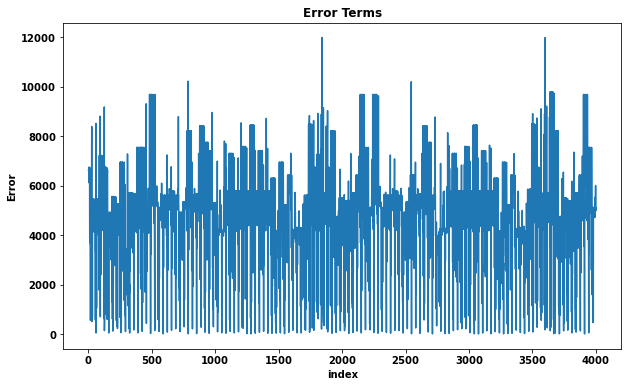

In [44]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,4001,1)]
plt.plot(c,abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [45]:
X=df.drop("sales",1)

In [46]:
y=df.sales

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [49]:
X_train.head()

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
1420095,34,6,1,49.07,1980,0,0,0,0,0,...,0,0,0,0,0,0,1,1,6,2016
1808198,6,13,1,53.38,1746,0,0,0,0,0,...,0,0,0,0,0,0,3,11,4,2017
1887730,42,2,1,46.41,999,0,0,0,0,0,...,0,0,0,0,0,0,3,13,6,2017
165058,26,10,0,93.41,838,0,0,0,0,0,...,0,0,0,0,0,0,3,3,6,2013
1604357,5,4,1,48.72,1186,0,0,0,0,0,...,0,0,0,0,0,0,3,28,10,2016


In [50]:
class MLR():   
    def __init__ (self):
        self.beta=None
    
    def fit(self, X_train, y_train):
        #fit the xtrain and ytrain to the model
        #inserting 1 value at the starting of each row
        X_train = np.c_[np.ones(len(X_train)), X_train]
        #calculating coefficients
        #pinv means Compute the (Moore-Penrose) pseudo-inverse of a matrix.
        #https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html
        self.beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
        
    def predict(self, X_test):
        #predicting the y value from X_test features
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        #dot product of X_test and beta
        y_pred = np.dot(X_test, self.beta)
        return y_pred    

In [51]:
lr=MLR()

In [52]:
lr.fit(X_train, y_train)

In [53]:
y_test_pred=lr.predict(X_test)

In [54]:
checknegative(y_test_pred)

negative values are present


In [55]:
y_pred=handlenegative(y_test_pred)

negative values are handled successfully


In [56]:
root_mse=rmse(y_test,y_pred)

In [57]:
root_r2score=rsquared(y_test,y_pred)

In [58]:
print("root mean squared error for testing dataframe: ",root_mse)

root mean squared error for testing dataframe:  606.708312089057


In [59]:
print("r squared value: ",root_r2score)

r squared value:  0.6299401034012488


In [60]:
multi_lr={'Model': 'Multiple Linear Regression', 'RMSE Error': root_mse, 'R squared value': root_r2score}

In [61]:
performance = performance.append(multi_lr, ignore_index = True)

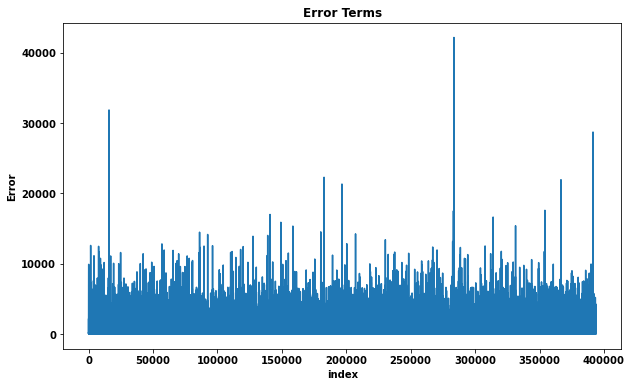

In [62]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,abs(y_test-y_test_pred))
#plt.yticks(np.arange(0,45000,5000))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

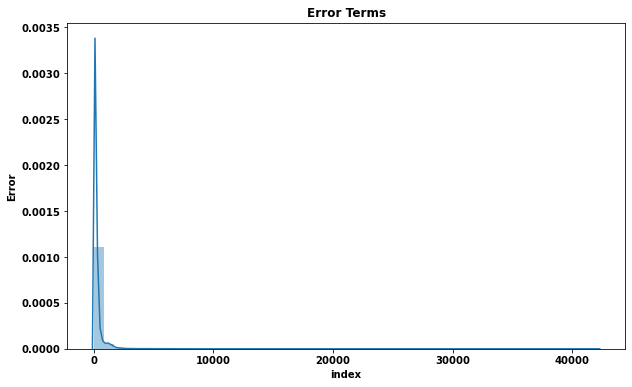

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(abs(y_test-y_test_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [64]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_test_pred,
                   "error":abs(y_test-y_test_pred)})

In [65]:
error.head()

,true y,prediction y,error
1545018,195,363.182634,168.182634
412575,175,92.231495,82.768505
310040,332,246.432423,85.567577
1898772,291,157.325165,133.674835
1202460,13,279.403057,266.403057


In [66]:
new_df=pd.concat([X_test,error], axis=1)

In [67]:
new_df=new_df[new_df['error']<10000]

In [68]:
new_df.head()

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year,true y,prediction y,error
1545018,38,4,1,45.88,1349,0,0,0,0,0,...,0,0,0,3,9,9,2016,195,363.182634,168.182634
412575,27,1,0,93.78,1245,0,0,0,0,0,...,0,0,0,3,15,1,2014,175,92.231495,82.768505
310040,23,9,0,102.17,1286,0,0,0,0,0,...,0,0,0,3,11,10,2013,332,246.432423,85.567577
1898772,52,11,1,42.48,1829,0,0,0,0,0,...,0,0,0,0,21,6,2017,291,157.325165,133.674835
1202460,24,1,1,37.64,2466,0,0,0,0,0,...,0,0,0,3,7,12,2015,13,279.403057,266.403057


In [69]:
X=new_df.drop(['true y','prediction y','error'],1)

In [70]:
X.head()

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
1545018,38,4,1,45.88,1349,0,0,0,0,0,...,0,1,0,0,0,0,3,9,9,2016
412575,27,1,0,93.78,1245,0,0,0,0,0,...,1,0,0,0,0,0,3,15,1,2014
310040,23,9,0,102.17,1286,0,0,0,0,0,...,0,0,0,0,0,0,3,11,10,2013
1898772,52,11,1,42.48,1829,0,0,0,0,0,...,0,0,1,0,0,0,0,21,6,2017
1202460,24,1,1,37.64,2466,0,0,0,0,0,...,0,0,0,0,0,0,3,7,12,2015


In [71]:
y=new_df['true y']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [73]:
y_test_pred=lr.predict(X_test)

In [74]:
checknegative(y_test_pred)

negative values are present


In [75]:
y_pred=handlenegative(y_test_pred)

negative values are handled successfully


In [76]:
print("root mean squared error after removing errors more than 10000: ",rmse(y_test,y_pred))

root mean squared error after removing errors more than 10000:  571.7257118414667


In [77]:
print("r squared value after removing the errors more than 10000: ",rsquared(y_test,y_pred))

r squared value after removing the errors more than 10000:  0.6484780669020809


In [78]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred,
                   "error":abs(y_test-y_pred)})

In [79]:
error

,true y,prediction y,error
1018459,8,0.000000,8.000000
436430,892,851.419696,40.580304
924748,8,0.000000,8.000000
1847459,0,0.000000,0.000000
1282765,93,117.853002,24.853002
...,...,...,...
623249,55,0.000000,55.000000
311809,216,391.286152,175.286152
1185194,95,363.342205,268.342205
1210945,297,45.368277,251.631723


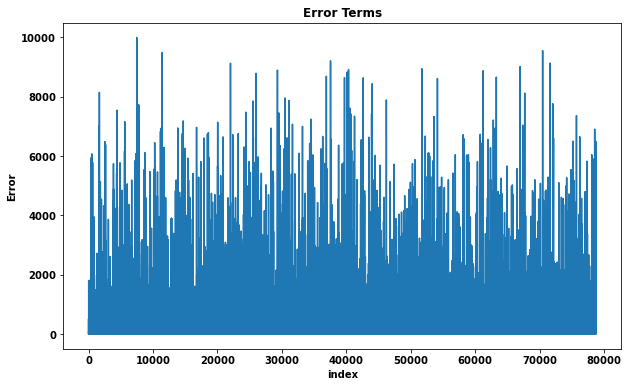

In [80]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_pred)+1,1)]
plt.plot(c,error['error'])
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
X=df.drop("sales",1)

In [83]:
y=df.sales

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [85]:
rmse_depth=[]
for i in range(1,30):
    dt=DecisionTreeRegressor(criterion='mse',max_depth=i)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    rmse_depth.append(rmse)
    
rmse_depth=np.array(rmse_depth)

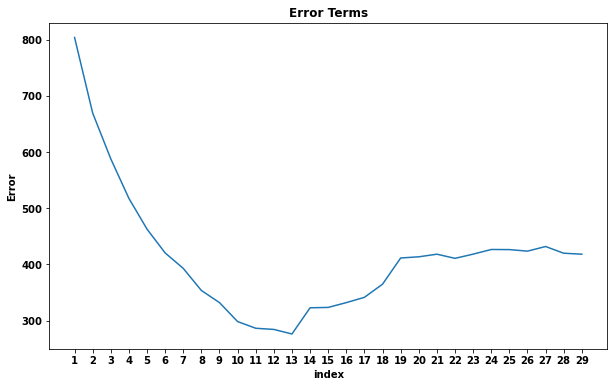

In [86]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(rmse_depth)+1,1)]
plt.plot(c,rmse_depth)
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.xticks(np.arange(1,30))
plt.show()

In [87]:
print("From the above graph we can say that depth of {} having least rmse loss {}".format(rmse_depth.argmin()+1,rmse_depth.min()))

From the above graph we can say that depth of 13 having least rmse loss 276.22242883363896


In [88]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=rmse_depth.argmin()+1)

In [89]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [90]:
checknegative(y_pred)

no negative values are present


In [91]:
dt_rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())

In [92]:
dt_r2score=rsquared(y_test,y_pred)

In [93]:
print("root mean squared error for decision tree regressor: ",dt_rmse)

root mean squared error for decision tree regressor:  286.2502641686466


In [94]:
print("r squared value: ",root_r2score)

r squared value:  0.6299401034012488


In [95]:
decision={'Model': 'Decision Tree Regressor', 'RMSE Error': dt_rmse, 'R squared value': dt_r2score}

In [96]:
performance = performance.append(decision, ignore_index = True)

In [97]:
performance

,Model,RMSE Error,R squared value
0,Naive Bayes Regressor,5943.463227,-22.606927
1,Multiple Linear Regression,606.708312,0.629940
2,Decision Tree Regressor,286.250264,0.917623


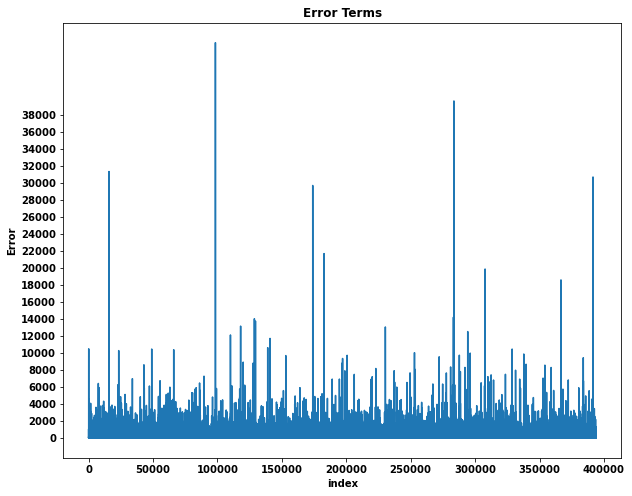

In [98]:
plt.figure(figsize=(10,8))
c = [i for i in range(1,len(y_pred)+1,1)]
plt.plot(c,abs(y_test-y_pred))
plt.yticks(np.arange(0,40000,2000))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

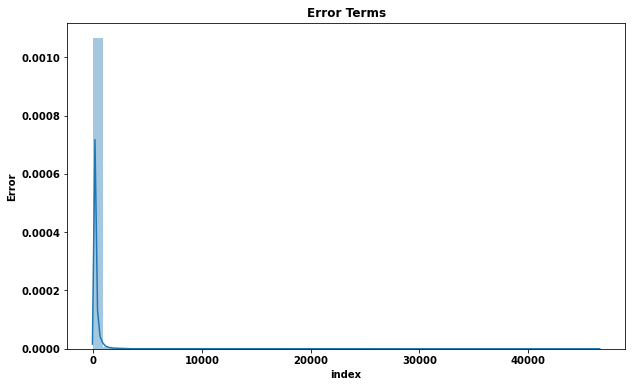

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [100]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred,
                   "error":abs(y_test-y_pred)})

In [101]:
error

,true y,prediction y,error
1545018,195,266.660415,71.660415
412575,175,183.859355,8.859355
310040,332,355.054711,23.054711
1898772,291,45.439231,245.560769
1202460,13,45.439231,32.439231
...,...,...,...
1882759,73,24.423575,48.576425
300215,0,28.867741,28.867741
1515018,2,45.439231,43.439231
462015,0,28.867741,28.867741


In [102]:
new_df=pd.concat([X_test,error], axis=1)

In [103]:
new_df=new_df[new_df['error']<6000]

In [104]:
new_df.shape

(393616, 42)

In [105]:
X=new_df.drop(['true y','prediction y','error'],1)

In [106]:
y=new_df['true y']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [108]:
y_pred=dt.predict(X_test)

In [109]:
checknegative(y_pred)

no negative values are present


In [110]:
print("root mean squared error after removing errors more than 6000: ",np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()))

root mean squared error after removing errors more than 6000:  215.61578800806086


In [111]:
print("r squared value after removing the errors more than 5000: ",rsquared(y_test,y_pred))

r squared value after removing the errors more than 5000:  0.9505312152232556


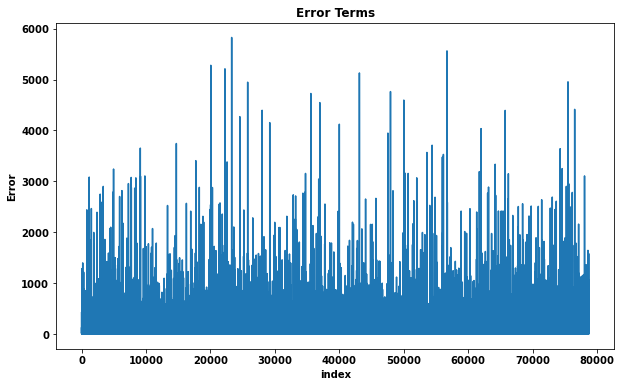

In [112]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_pred)+1,1)]
plt.plot(c,abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [113]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.ensemble import RandomForestRegressor

In [114]:
df.head()

,store_nbr,sales,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,2,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,810,1,0,93.14,770,0,1,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [115]:
X=df.drop('sales',1)

In [116]:
y=df.sales

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=10000,test_size=20000,random_state=0)

In [118]:
X_train.shape

(10000, 39)

In [119]:
params = {'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'criterion':hp.choice('criterion',['squared_error','absolute_error','poisson']),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

In [120]:
params

{'max_depth': <hyperopt.pyll.base.Apply at 0x151874b3730>,
 'max_features': <hyperopt.pyll.base.Apply at 0x151874a0fd0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x151874b7160>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x151874b7280>,
 'criterion': <hyperopt.pyll.base.Apply at 0x151874b7370>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x151874b74f0>}

In [121]:
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])
    model = RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    y_pred_hyperopt = model.predict(X_test)
    y_pred=[]
    for i in y_pred_hyperopt:
        if i<0:
            y_pred.append(0)
        else:
            y_pred.append(i)
    score = np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=100)
    return best

trial=Trials()
best=optimize(trial)

100%|██████████| 100/100 [13:39<00:00,  8.19s/trial, best loss: 422.73605983591403]


In [122]:
print("The best parameters that we need to consider for random forest are:",best)

The best parameters that we need to consider for random forest are: {'max_depth': 11.16252221724778, 'min_samples_leaf': 1.0112047897604473, 'min_samples_split': 3.7114005747712895, 'n_estimators': 141.9635336579238}


In [123]:
trainedforest = RandomForestRegressor(max_depth = best['max_depth'],  
                                       min_samples_leaf = round(best['min_samples_leaf']), 
                                       min_samples_split = round(best['min_samples_split']), 
                                       n_estimators = int(best['n_estimators'])).fit(X_train,y_train)

In [124]:
y_pred_hyperopt = trainedforest.predict(X_test)

In [125]:
checknegative(y_pred_hyperopt)

no negative values are present


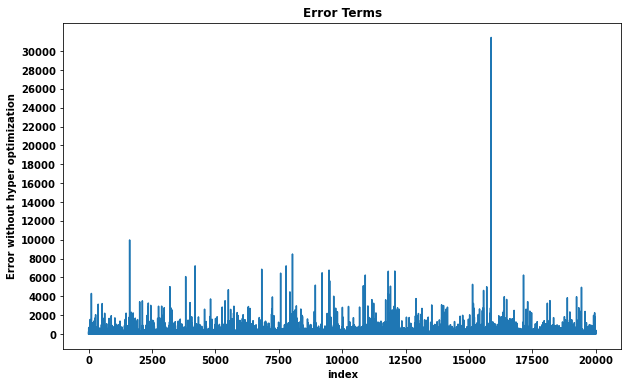

In [126]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,abs(y_test-y_pred_hyperopt))
plt.yticks(np.arange(0,max(abs(y_test-y_pred_hyperopt)),2000))
plt.ylabel("Error without hyper optimization")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [127]:
rf_rmse=np.sqrt(np.square(np.subtract(y_test,y_pred_hyperopt)).mean())
rf_r2score=rsquared(y_test,y_pred_hyperopt)

In [128]:
print("root mean squared error for Random Forest: ",rf_rmse)

root mean squared error for Random Forest:  431.21002043654926


In [129]:
print("R Squared Value for Random Forest: ",rf_r2score)

R Squared Value for Random Forest:  0.8251064178451029


In [130]:
randomforest={'Model': 'Random Forest Regressor', 'RMSE Error': rf_rmse, 'R squared value': rf_r2score}
performance = performance.append(randomforest, ignore_index = True)

In [131]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred_hyperopt,
                   "error":abs(y_test-y_pred_hyperopt)})

In [132]:
new_df=pd.concat([X_test,error], axis=1)

In [133]:
new_df=new_df[(new_df['error']<4500)]

In [134]:
X=new_df.drop(['true y','prediction y','error'],1)

In [135]:
y=new_df['true y']

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [137]:
y_pred=trainedforest.predict(X_test)

In [138]:
checknegative(y_pred)

no negative values are present


In [139]:
print("root mean squared error after removing errors more than 2000: ",np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()))

root mean squared error after removing errors more than 2000:  293.2779610196422


In [140]:
print("r squared value after removing the errors more than 2000: ",rsquared(y_test,y_pred))

r squared value after removing the errors more than 2000:  0.8956892041363779


In [141]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred,
                   "error":y_test-y_pred})

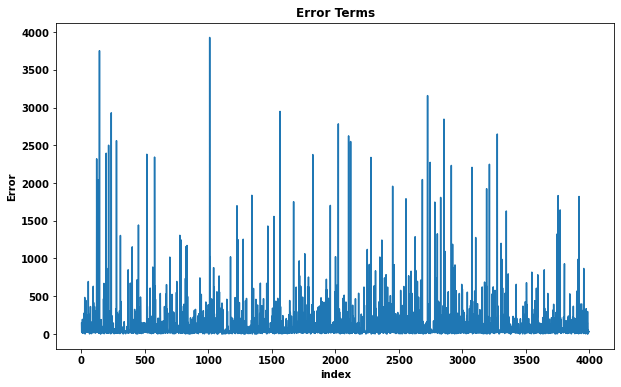

In [142]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_pred)+1,1)]
plt.plot(c,abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [143]:
df=pd.read_csv("kaggle_train.csv",parse_dates=['date'])

In [144]:
new_df=pd.DataFrame({"date":df.groupby(['date'])['sales'].mean().index,
                       "sales":df.groupby(['date'])['sales'].mean().values})

In [145]:
new_df.head()

,date,sales
0,2013-01-01,76.000000
1,2013-01-02,326.733860
2,2013-01-03,238.047431
3,2013-01-04,233.429513
4,2013-01-07,221.353096


<AxesSubplot:>

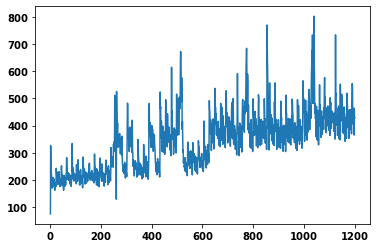

In [146]:
new_df['sales'].plot()

In [147]:
from statsmodels.tsa.stattools import adfuller

In [148]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [149]:
adfuller_test(new_df['sales'])

ADF Test Statistic : -2.7141689969899585
p-value : 0.07161834249784746
#Lags Used : 23
Number of Observations Used : 1178
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [150]:
new_df['seasonal_difference']=new_df['sales']-new_df['sales'].shift(12)

In [151]:
adfuller_test(new_df['seasonal_difference'].dropna())

ADF Test Statistic : -11.210675700219825
p-value : 2.1294593773025642e-20
#Lags Used : 23
Number of Observations Used : 1166
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


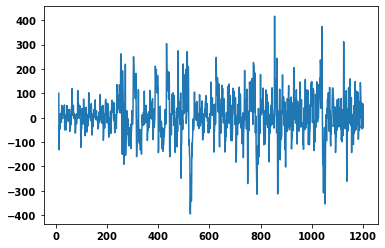

In [152]:
new_df['seasonal_difference'].plot()
plt.show()

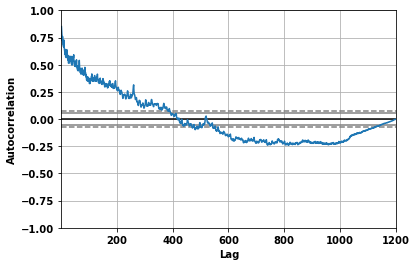

In [153]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(new_df['sales'])
plt.show()

In [154]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(new_df['sales'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12831.700, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13096.566, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12977.245, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12912.459, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13094.598, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12849.060, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12851.632, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12791.158, Time=0.93 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12851.180, Time=0.94 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=12629.758, Time=2.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=12714.098, Time=0.80 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=12553.785, Time=2.06 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(5,1,3)(0,0,0)[0] interce

In [155]:
train=new_df.iloc[:-30]
test=new_df.iloc[-30:]
print(train.shape,test.shape)

(1172, 3) (30, 3)


In [156]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['sales'],order=(4,1,3))
model=model.fit()
model.summary()

C:\Users\ganes\madara\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1172
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -6119.441
Date:                Fri, 11 Mar 2022   AIC                          12254.881
Time:                        20:08:22   BIC                          12295.406
Sample:                             0   HQIC                         12270.165
                               - 1172                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9719      0.031    -31.442      0.000      -1.032      -0.911
ar.L2         -0.1237      0.058     -2.122      0.034      -0.238      -0.009
ar.L3          0.3769      0.060      6.327      0.000       0.260       0.494
ar.L4         -0.1632      0.032     -5.127      0.000      -0.226      -0.101
ma.L1          0.7265      0.029     24.860      0.000       0.669       0.784
ma.L2         -0.3749      0.041     -9.135      0.000      -0.455      -0.294
ma.L3         -0.7772      0.026    -29.846      0.000      -0.828      -0.726
sigma2      2093.6337     36.838     56.834      0.000    2021.433    2165.834
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              8370.37
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

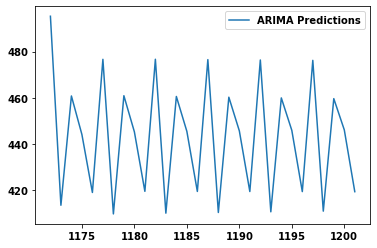

In [157]:
start=len(train)
end=len(train)+len(test)-1
prediction=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
prediction.plot(legend=True)

In [158]:
arima_rmse=np.sqrt(np.square(np.subtract(test['sales'],prediction)).mean())
print("root mean squared error for arima model: ",arima_rmse)

root mean squared error for arima model:  40.79714204980144


In [159]:
arima_r2score=rsquared(test['sales'].values,prediction)
print("r squared value: ",root_r2score)

r squared value:  0.6299401034012488


In [160]:
arima_model={'Model': 'ARIMA', 'RMSE Error': arima_rmse, 'R squared value': arima_r2score}
performance = performance.append(arima_model, ignore_index = True)

In [161]:
prediction.index=new_df.index[start:end+1]

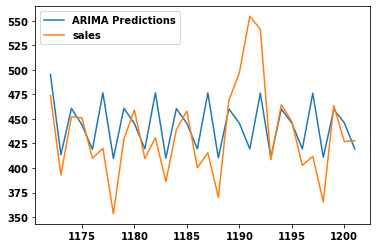

In [162]:
prediction.plot(legend=True)
test['sales'].plot(legend=True)
plt.show()

In [163]:
performance

,Model,RMSE Error,R squared value
0,Naive Bayes Regressor,5943.463227,-22.606927
1,Multiple Linear Regression,606.708312,0.629940
2,Decision Tree Regressor,286.250264,0.917623
3,Random Forest Regressor,431.210020,0.825106
4,ARIMA,40.797142,0.181399


In [164]:
df.head()

,Unnamed: 0,date,store_nbr,sales,onpromotion,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,...,c_Cayambe,c_Cuenca,c_Ambato,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type
0,0,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
1,1,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
2,2,2013-01-01,25,2,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
3,3,2013-01-01,25,810,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
4,4,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3


In [165]:
df['day']=df['date'].dt.day

In [166]:
df['month']=df['date'].dt.month

In [167]:
df['year']=df['date'].dt.year

In [168]:
#as cluster depends on store_nbr
df.drop(["date",'Unnamed: 0','onpromotion'],1,inplace=True)

In [169]:
X=df.drop(['sales'],1)

In [170]:
y=df.sales

In [171]:
X.head()

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,1,0,93.14,770,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,1,0,93.14,770,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,1,0,93.14,770,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,1,0,93.14,770,0,1,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,1,0,93.14,770,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [173]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [174]:
df.head()

,store_nbr,sales,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,2,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,810,1,0,93.14,770,0,1,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [175]:
X=df.drop(['sales'],1)

In [176]:
y=df.sales

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [178]:
X_train

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
1420095,34,6,1,49.07,1980,0,0,0,0,0,...,0,0,0,0,0,0,1,1,6,2016
1808198,6,13,1,53.38,1746,0,0,0,0,0,...,0,0,0,0,0,0,3,11,4,2017
1887730,42,2,1,46.41,999,0,0,0,0,0,...,0,0,0,0,0,0,3,13,6,2017
165058,26,10,0,93.41,838,0,0,0,0,0,...,0,0,0,0,0,0,3,3,6,2013
1604357,5,4,1,48.72,1186,0,0,0,0,0,...,0,0,0,0,0,0,3,28,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,14,7,0,93.98,1435,0,0,0,0,0,...,0,0,0,0,0,0,2,22,5,2013
963395,38,4,0,58.88,1596,0,0,0,0,0,...,0,1,0,0,0,0,3,22,5,2015
117952,43,10,1,88.04,1375,0,0,0,0,0,...,0,0,0,0,0,1,4,19,4,2013
1484405,22,7,1,43.41,666,0,0,0,0,0,...,0,0,0,0,0,0,2,22,7,2016


In [179]:
rmse_depth_xg=[]
for i in range(0,200,20):
    xgb=XGBRegressor(n_estimators=i)
    xgb.fit(X_train,y_train)
    y_test_pred=xgb.predict(X_test)
    y_pred=[]
    for j in y_test_pred:
        if j>0:
            y_pred.append(j)
        else:
            y_pred.append(0)
    rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    rmse_depth_xg.append(rmse)
    print("For {} estimators the Root Mean Squared Error is: {}".format(i,rmse))
rmse_depth_xg=np.array(rmse_depth_xg)

For 0 estimators the Root Mean Squared Error is: 1056.7043203113503
For 20 estimators the Root Mean Squared Error is: 298.70253354061606
For 40 estimators the Root Mean Squared Error is: 274.971285371366
For 60 estimators the Root Mean Squared Error is: 259.8229387526132
For 80 estimators the Root Mean Squared Error is: 253.35470834183155
For 100 estimators the Root Mean Squared Error is: 249.84167950664835
For 120 estimators the Root Mean Squared Error is: 249.25316886245406
For 140 estimators the Root Mean Squared Error is: 247.3561754033235
For 160 estimators the Root Mean Squared Error is: 249.33676254367086
For 180 estimators the Root Mean Squared Error is: 247.91581335634842


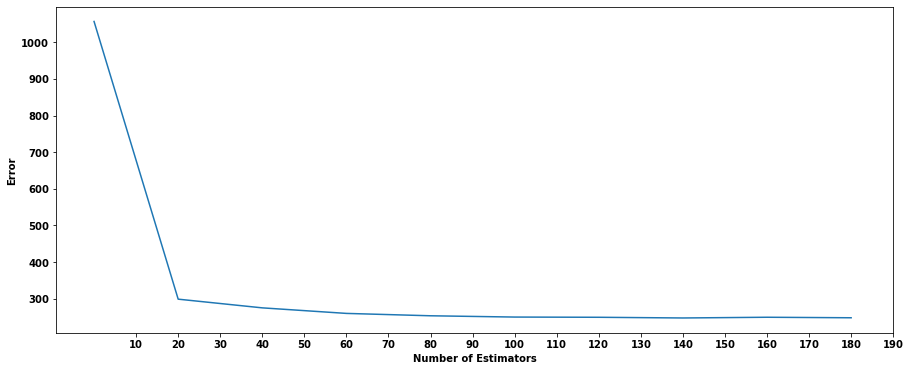

In [180]:
plt.figure(figsize=(15,6))
c = np.arange(0,200,20)
plt.plot(c,rmse_depth_xg)
plt.ylabel("Error")
plt.xlabel("Number of Estimators")
#plt.yticks(np.arange(0,0.5,0.05))
plt.xticks(np.arange(10,200,10))
plt.show()

In [181]:
rmse_depth_lgbm=[]
for i in range(1,200,20):
    lgbm=LGBMRegressor(n_estimators=i)
    lgbm.fit(X_train,y_train)
    y_test_pred=lgbm.predict(X_test)
    y_pred=[]
    for j in y_test_pred:
        if j>0:
            y_pred.append(j)
        else:
            y_pred.append(0)
    rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    rmse_depth_lgbm.append(rmse)
    print("For {} estimators the Root Mean Squared Error is: {}".format(i,rmse))

rmse_depth_lgbm=np.array(rmse_depth_lgbm)

For 1 estimators the Root Mean Squared Error is: 916.5189933455845
For 21 estimators the Root Mean Squared Error is: 365.5818405507884
For 41 estimators the Root Mean Squared Error is: 306.3854871324162
For 61 estimators the Root Mean Squared Error is: 287.3919812900254
For 81 estimators the Root Mean Squared Error is: 277.5448239610049
For 101 estimators the Root Mean Squared Error is: 271.480959574692
For 121 estimators the Root Mean Squared Error is: 266.22264886453826
For 141 estimators the Root Mean Squared Error is: 262.5485856869243
For 161 estimators the Root Mean Squared Error is: 259.10777451715114
For 181 estimators the Root Mean Squared Error is: 256.7592111272062


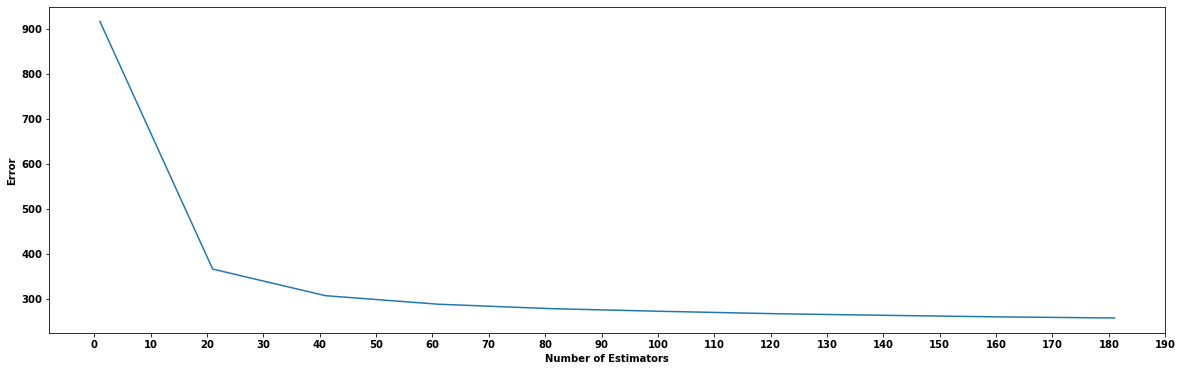

In [182]:
plt.figure(figsize=(20,6))
c = np.arange(1,200,20)
plt.plot(c,rmse_depth_lgbm)
plt.ylabel("Error")
plt.xlabel("Number of Estimators")
plt.xticks(np.arange(0,200,10))
plt.show()

In [183]:
for i in range(1,len(rmse_depth_lgbm)):
    per=(rmse_depth_lgbm[i]-rmse_depth_lgbm[i-1])/rmse_depth_lgbm[i]
    print(abs(per)*100)

150.70145496416066
19.320873835250637
6.608919899968692
3.547952070763178
2.2336241907398158
1.975155281709082
1.3993841056127765
1.3279459391695705
0.9146948923991701


In [184]:
for i in range(1,len(rmse_depth_xg)):
    per=(rmse_depth_xg[i]-rmse_depth_xg[i-1])/rmse_depth_xg[i]
    print(abs(per)*100)

253.7647665006045
8.630445952638123
5.830257594452071
2.5530334340795315
1.4061019931182954
0.23610959366339926
0.7669076610023733
0.7943422061560044
0.5731579474843729


In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [186]:
xgb=XGBRegressor(n_estimators=80)

In [187]:
lgmbr=LGBMRegressor(n_estimators=100)

In [188]:
estimators = [("Xg Boost",xgb),
            ("Decision Tree",dt),
              ("LightGBM",lgmbr)]

In [189]:
stacking_regressor = StackingRegressor(estimators=estimators)

In [190]:
rmse=[]
r2score=[]

In [191]:
def plot_regression_results(ax, y_true, y_pred, model):
    c = [i for i in range(1,len(y_pred)+1,1)]
    ax.plot(c,abs(y_test-y_pred))
    ax.set_ylabel("Error")
    ax.set_xlabel("index")
    ax.set_title("Error Terms for {}".format(model))

Xg Boost training has been completed on training dataset
For Xg Boost the rmse value is 254.3184334567218
For Xg Boost the rsquare value is 0.9349768787461705
Decision Tree training has been completed on training dataset
For Decision Tree the rmse value is 275.6945422123805
For Decision Tree the rsquare value is 0.9235867853385551
LightGBM training has been completed on training dataset
For LightGBM the rmse value is 271.7798546553605
For LightGBM the rsquare value is 0.9257414170751219


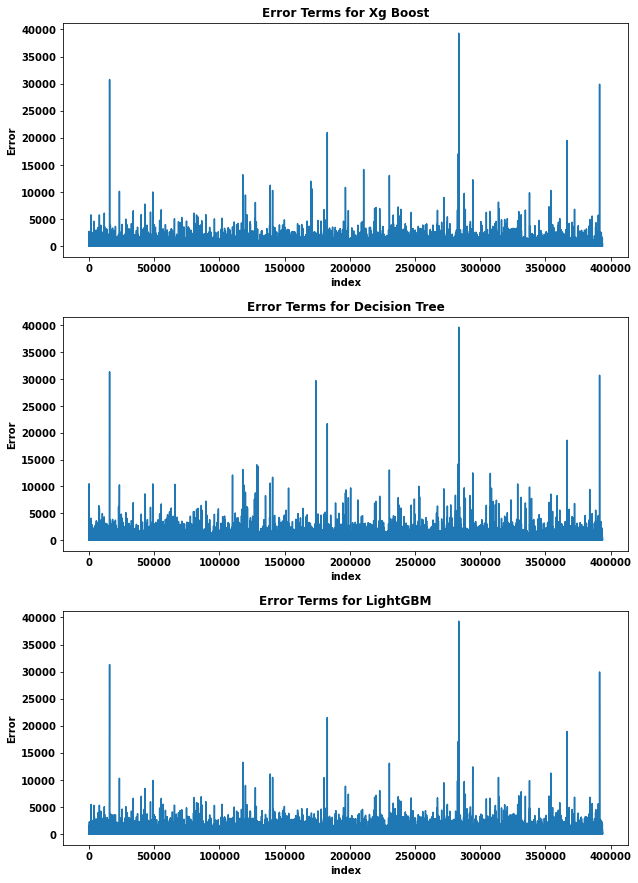

In [192]:
fig, axs = plt.subplots(3, 1, figsize=(9, 12))
axs = np.ravel(axs)
errors_list=[]
for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    
    model=est.fit(X_train,y_train)
    print("{} training has been completed on training dataset".format(name))
    y_pred = model.predict(X_test)
    root_mse=np.sqrt(mean_squared_error(y_test,y_pred))
    print("For {} the rmse value is {}".format(name,root_mse))
    rsquare=r2_score(y_test,y_pred)
    print("For {} the rsquare value is {}".format(name,rsquare))
    rmse.append(root_mse)
    r2score.append(rsquare)
    plot_regression_results(ax,y_test,y_pred,name)

plt.tight_layout()
plt.subplots_adjust(top=1)
plt.show()

In [193]:
performance=pd.DataFrame({"Model":['Xg Boost','Decision Tree','LightGBM'],
                         'RMSE Error':rmse,
                         "R Squared Value":r2score})

In [194]:
performance

,Model,RMSE Error,R Squared Value
0,Xg Boost,254.318433,0.934977
1,Decision Tree,275.694542,0.923587
2,LightGBM,271.779855,0.925741


In [195]:
from catboost import CatBoostRegressor,Pool

In [196]:
params = {'iterations':2000,
        'learning_rate':0.3,
        'depth':3,
        'loss_function':'RMSE',
        'eval_metric':'RMSE',
        'verbose':True,
        'use_best_model':True}

In [197]:
model = CatBoostRegressor(**params)

In [198]:
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),  
          use_best_model=True,  
          plot= True   
         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 848.8126400	test: 832.9466146	best: 832.9466146 (0)	total: 251ms	remaining: 8m 21s
1:	learn: 754.1920223	test: 736.3412443	best: 736.3412443 (1)	total: 333ms	remaining: 5m 32s
2:	learn: 692.0859163	test: 672.5200555	best: 672.5200555 (2)	total: 433ms	remaining: 4m 48s
3:	learn: 652.9239226	test: 632.2489855	best: 632.2489855 (3)	total: 552ms	remaining: 4m 35s
4:	learn: 626.5074053	test: 605.0261617	best: 605.0261617 (4)	total: 664ms	remaining: 4m 24s
5:	learn: 604.2131278	test: 582.1097076	best: 582.1097076 (5)	total: 768ms	remaining: 4m 15s
6:	learn: 587.7248675	test: 564.5866091	best: 564.5866091 (6)	total: 869ms	remaining: 4m 7s
7:	learn: 573.9758769	test: 550.9298994	best: 550.9298994 (7)	total: 975ms	remaining: 4m 2s
8:	learn: 561.6883590	test: 538.0742207	best: 538.0742207 (8)	total: 1.07s	remaining: 3m 57s
9:	learn: 550.5112627	test: 526.5563975	best: 526.5563975 (9)	total: 1.17s	remaining: 3m 52s
10:	learn: 545.3304146	test: 521.0731467	best: 521.0731467 (10)	total: 1

88:	learn: 403.2176857	test: 374.3904363	best: 374.3904363 (88)	total: 9.08s	remaining: 3m 15s
89:	learn: 402.6628102	test: 373.6782633	best: 373.6782633 (89)	total: 9.18s	remaining: 3m 14s
90:	learn: 401.9638365	test: 373.1261878	best: 373.1261878 (90)	total: 9.3s	remaining: 3m 15s
91:	learn: 401.7971110	test: 372.9452582	best: 372.9452582 (91)	total: 9.42s	remaining: 3m 15s
92:	learn: 401.1532640	test: 372.1412114	best: 372.1412114 (92)	total: 9.51s	remaining: 3m 15s
93:	learn: 400.7245267	test: 371.6087890	best: 371.6087890 (93)	total: 9.61s	remaining: 3m 14s
94:	learn: 400.2210726	test: 371.0621414	best: 371.0621414 (94)	total: 9.71s	remaining: 3m 14s
95:	learn: 399.5914024	test: 370.3838326	best: 370.3838326 (95)	total: 9.82s	remaining: 3m 14s
96:	learn: 398.9542953	test: 369.5437312	best: 369.5437312 (96)	total: 9.93s	remaining: 3m 14s
97:	learn: 398.5737083	test: 369.1602018	best: 369.1602018 (97)	total: 10s	remaining: 3m 14s
98:	learn: 398.2070315	test: 368.8987588	best: 368.89

173:	learn: 373.8213159	test: 342.5315682	best: 342.5315682 (173)	total: 18.3s	remaining: 3m 11s
174:	learn: 373.7036699	test: 342.3950534	best: 342.3950534 (174)	total: 18.4s	remaining: 3m 11s
175:	learn: 373.5675237	test: 342.2596591	best: 342.2596591 (175)	total: 18.5s	remaining: 3m 11s
176:	learn: 373.3049418	test: 341.9037440	best: 341.9037440 (176)	total: 18.6s	remaining: 3m 11s
177:	learn: 373.0875004	test: 341.6852777	best: 341.6852777 (177)	total: 18.7s	remaining: 3m 10s
178:	learn: 373.0020184	test: 341.6019326	best: 341.6019326 (178)	total: 18.8s	remaining: 3m 10s
179:	learn: 372.7917118	test: 341.3705715	best: 341.3705715 (179)	total: 18.9s	remaining: 3m 10s
180:	learn: 372.6504092	test: 341.2131853	best: 341.2131853 (180)	total: 18.9s	remaining: 3m 10s
181:	learn: 372.5045127	test: 341.0612017	best: 341.0612017 (181)	total: 19s	remaining: 3m 10s
182:	learn: 372.1753113	test: 340.7391329	best: 340.7391329 (182)	total: 19.1s	remaining: 3m 10s
183:	learn: 372.0074499	test: 34

260:	learn: 357.9242759	test: 325.6719287	best: 325.6719287 (260)	total: 27.2s	remaining: 3m 1s
261:	learn: 357.7114341	test: 325.4282407	best: 325.4282407 (261)	total: 27.3s	remaining: 3m 1s
262:	learn: 357.6096906	test: 325.3170911	best: 325.3170911 (262)	total: 27.5s	remaining: 3m 1s
263:	learn: 357.3494871	test: 325.0192708	best: 325.0192708 (263)	total: 27.6s	remaining: 3m 1s
264:	learn: 357.2889302	test: 324.9866257	best: 324.9866257 (264)	total: 27.7s	remaining: 3m 1s
265:	learn: 357.2389433	test: 324.8918124	best: 324.8918124 (265)	total: 27.8s	remaining: 3m 1s
266:	learn: 357.0486278	test: 324.4979254	best: 324.4979254 (266)	total: 27.9s	remaining: 3m 1s
267:	learn: 356.8045865	test: 324.2527597	best: 324.2527597 (267)	total: 28s	remaining: 3m 1s
268:	learn: 356.7255398	test: 324.2674892	best: 324.2527597 (267)	total: 28.1s	remaining: 3m
269:	learn: 356.6889665	test: 324.2261397	best: 324.2261397 (269)	total: 28.2s	remaining: 3m
270:	learn: 356.3567559	test: 323.8719398	best: 

347:	learn: 348.0421038	test: 315.2592416	best: 315.2592416 (347)	total: 36.1s	remaining: 2m 51s
348:	learn: 347.9643455	test: 315.1595960	best: 315.1595960 (348)	total: 36.2s	remaining: 2m 51s
349:	learn: 347.9279967	test: 315.1001637	best: 315.1001637 (349)	total: 36.3s	remaining: 2m 51s
350:	learn: 347.8796053	test: 315.0942906	best: 315.0942906 (350)	total: 36.4s	remaining: 2m 51s
351:	learn: 347.6902177	test: 314.8704351	best: 314.8704351 (351)	total: 36.5s	remaining: 2m 51s
352:	learn: 347.6235123	test: 314.8045512	best: 314.8045512 (352)	total: 36.6s	remaining: 2m 50s
353:	learn: 347.5108681	test: 314.7164890	best: 314.7164890 (353)	total: 36.7s	remaining: 2m 50s
354:	learn: 347.4280793	test: 314.6084541	best: 314.6084541 (354)	total: 36.8s	remaining: 2m 50s
355:	learn: 347.2319199	test: 314.3842055	best: 314.3842055 (355)	total: 36.9s	remaining: 2m 50s
356:	learn: 347.1753808	test: 314.3352106	best: 314.3352106 (356)	total: 37.1s	remaining: 2m 50s
357:	learn: 347.1464604	test: 

432:	learn: 341.2312223	test: 307.9657548	best: 307.9657548 (432)	total: 45.1s	remaining: 2m 43s
433:	learn: 341.1785256	test: 307.9059205	best: 307.9059205 (433)	total: 45.2s	remaining: 2m 43s
434:	learn: 341.0049275	test: 307.6626798	best: 307.6626798 (434)	total: 45.3s	remaining: 2m 43s
435:	learn: 340.9170404	test: 307.6230673	best: 307.6230673 (435)	total: 45.5s	remaining: 2m 43s
436:	learn: 340.8680615	test: 307.5822239	best: 307.5822239 (436)	total: 45.5s	remaining: 2m 42s
437:	learn: 340.8555845	test: 307.5686304	best: 307.5686304 (437)	total: 45.6s	remaining: 2m 42s
438:	learn: 340.7463244	test: 307.4769497	best: 307.4769497 (438)	total: 45.8s	remaining: 2m 42s
439:	learn: 340.7109476	test: 307.4374786	best: 307.4374786 (439)	total: 45.9s	remaining: 2m 42s
440:	learn: 340.6231870	test: 307.3338127	best: 307.3338127 (440)	total: 46s	remaining: 2m 42s
441:	learn: 340.5491031	test: 307.2157026	best: 307.2157026 (441)	total: 46.1s	remaining: 2m 42s
442:	learn: 340.4930492	test: 30

519:	learn: 335.1716515	test: 301.3045810	best: 301.3045810 (519)	total: 54.2s	remaining: 2m 34s
520:	learn: 335.1470326	test: 301.2822830	best: 301.2822830 (520)	total: 54.2s	remaining: 2m 33s
521:	learn: 335.1045663	test: 301.2442998	best: 301.2442998 (521)	total: 54.3s	remaining: 2m 33s
522:	learn: 335.0634377	test: 301.2026837	best: 301.2026837 (522)	total: 54.5s	remaining: 2m 33s
523:	learn: 335.0238788	test: 301.1722389	best: 301.1722389 (523)	total: 54.6s	remaining: 2m 33s
524:	learn: 334.9116906	test: 301.0713210	best: 301.0713210 (524)	total: 54.7s	remaining: 2m 33s
525:	learn: 334.8331517	test: 300.9851592	best: 300.9851592 (525)	total: 54.8s	remaining: 2m 33s
526:	learn: 334.7714430	test: 300.9449883	best: 300.9449883 (526)	total: 54.9s	remaining: 2m 33s
527:	learn: 334.7175306	test: 300.8840151	best: 300.8840151 (527)	total: 55s	remaining: 2m 33s
528:	learn: 334.6829462	test: 300.8515522	best: 300.8515522 (528)	total: 55.1s	remaining: 2m 33s
529:	learn: 334.6456549	test: 30

604:	learn: 331.4837866	test: 297.3603564	best: 297.3603564 (604)	total: 1m 3s	remaining: 2m 25s
605:	learn: 331.4713981	test: 297.3607982	best: 297.3603564 (604)	total: 1m 3s	remaining: 2m 25s
606:	learn: 331.4413876	test: 297.3313316	best: 297.3313316 (606)	total: 1m 3s	remaining: 2m 25s
607:	learn: 331.3891653	test: 297.2503539	best: 297.2503539 (607)	total: 1m 3s	remaining: 2m 25s
608:	learn: 331.3678207	test: 297.2257129	best: 297.2257129 (608)	total: 1m 3s	remaining: 2m 25s
609:	learn: 331.3311526	test: 297.1956385	best: 297.1956385 (609)	total: 1m 3s	remaining: 2m 24s
610:	learn: 331.2195406	test: 297.0586817	best: 297.0586817 (610)	total: 1m 3s	remaining: 2m 24s
611:	learn: 331.2041586	test: 297.0492642	best: 297.0492642 (611)	total: 1m 3s	remaining: 2m 24s
612:	learn: 331.1821100	test: 297.0264971	best: 297.0264971 (612)	total: 1m 3s	remaining: 2m 24s
613:	learn: 331.1509821	test: 296.9804788	best: 296.9804788 (613)	total: 1m 4s	remaining: 2m 24s
614:	learn: 331.1340155	test: 

689:	learn: 328.4277665	test: 294.4078745	best: 294.4078745 (689)	total: 1m 11s	remaining: 2m 16s
690:	learn: 328.3957387	test: 294.3467056	best: 294.3467056 (690)	total: 1m 12s	remaining: 2m 16s
691:	learn: 328.3304610	test: 294.2602467	best: 294.2602467 (691)	total: 1m 12s	remaining: 2m 16s
692:	learn: 328.2435581	test: 294.1167857	best: 294.1167857 (692)	total: 1m 12s	remaining: 2m 16s
693:	learn: 328.2287614	test: 294.1046490	best: 294.1046490 (693)	total: 1m 12s	remaining: 2m 16s
694:	learn: 328.2034596	test: 294.0748458	best: 294.0748458 (694)	total: 1m 12s	remaining: 2m 16s
695:	learn: 328.1687744	test: 294.0220551	best: 294.0220551 (695)	total: 1m 12s	remaining: 2m 15s
696:	learn: 328.1239163	test: 293.9779573	best: 293.9779573 (696)	total: 1m 12s	remaining: 2m 15s
697:	learn: 328.0923966	test: 293.9409608	best: 293.9409608 (697)	total: 1m 12s	remaining: 2m 15s
698:	learn: 328.0830104	test: 293.9373931	best: 293.9373931 (698)	total: 1m 12s	remaining: 2m 15s
699:	learn: 328.0740

774:	learn: 325.9663306	test: 291.9311385	best: 291.9311385 (774)	total: 1m 20s	remaining: 2m 7s
775:	learn: 325.9228322	test: 291.8669837	best: 291.8669837 (775)	total: 1m 21s	remaining: 2m 7s
776:	learn: 325.8683943	test: 291.7890761	best: 291.7890761 (776)	total: 1m 21s	remaining: 2m 7s
777:	learn: 325.8612415	test: 291.7797689	best: 291.7797689 (777)	total: 1m 21s	remaining: 2m 7s
778:	learn: 325.8175381	test: 291.7390731	best: 291.7390731 (778)	total: 1m 21s	remaining: 2m 7s
779:	learn: 325.8090082	test: 291.7299992	best: 291.7299992 (779)	total: 1m 21s	remaining: 2m 7s
780:	learn: 325.7987048	test: 291.7167537	best: 291.7167537 (780)	total: 1m 21s	remaining: 2m 7s
781:	learn: 325.7687732	test: 291.6806526	best: 291.6806526 (781)	total: 1m 21s	remaining: 2m 7s
782:	learn: 325.7463116	test: 291.6590729	best: 291.6590729 (782)	total: 1m 21s	remaining: 2m 7s
783:	learn: 325.7269225	test: 291.6428335	best: 291.6428335 (783)	total: 1m 21s	remaining: 2m 7s
784:	learn: 325.6914459	test: 

859:	learn: 323.8380808	test: 289.8188976	best: 289.8188976 (859)	total: 1m 29s	remaining: 1m 58s
860:	learn: 323.7763920	test: 289.7347091	best: 289.7347091 (860)	total: 1m 29s	remaining: 1m 58s
861:	learn: 323.7693602	test: 289.7200720	best: 289.7200720 (861)	total: 1m 29s	remaining: 1m 58s
862:	learn: 323.7327084	test: 289.6991736	best: 289.6991736 (862)	total: 1m 30s	remaining: 1m 58s
863:	learn: 323.6778705	test: 289.6384220	best: 289.6384220 (863)	total: 1m 30s	remaining: 1m 58s
864:	learn: 323.6516170	test: 289.6239776	best: 289.6239776 (864)	total: 1m 30s	remaining: 1m 58s
865:	learn: 323.6371451	test: 289.6183430	best: 289.6183430 (865)	total: 1m 30s	remaining: 1m 58s
866:	learn: 323.6215335	test: 289.6024951	best: 289.6024951 (866)	total: 1m 30s	remaining: 1m 58s
867:	learn: 323.6015978	test: 289.5749877	best: 289.5749877 (867)	total: 1m 30s	remaining: 1m 58s
868:	learn: 323.5951479	test: 289.5678596	best: 289.5678596 (868)	total: 1m 30s	remaining: 1m 58s
869:	learn: 323.5522

943:	learn: 321.6498742	test: 287.5140272	best: 287.5140272 (943)	total: 1m 38s	remaining: 1m 50s
944:	learn: 321.5962828	test: 287.4542874	best: 287.4542874 (944)	total: 1m 38s	remaining: 1m 50s
945:	learn: 321.5699621	test: 287.4276683	best: 287.4276683 (945)	total: 1m 38s	remaining: 1m 50s
946:	learn: 321.5096816	test: 287.3658843	best: 287.3658843 (946)	total: 1m 38s	remaining: 1m 50s
947:	learn: 321.4999210	test: 287.3546615	best: 287.3546615 (947)	total: 1m 39s	remaining: 1m 49s
948:	learn: 321.4783356	test: 287.3304720	best: 287.3304720 (948)	total: 1m 39s	remaining: 1m 49s
949:	learn: 321.4663392	test: 287.3187938	best: 287.3187938 (949)	total: 1m 39s	remaining: 1m 49s
950:	learn: 321.4216949	test: 287.2529318	best: 287.2529318 (950)	total: 1m 39s	remaining: 1m 49s
951:	learn: 321.3844909	test: 287.2118525	best: 287.2118525 (951)	total: 1m 39s	remaining: 1m 49s
952:	learn: 321.3756074	test: 287.2041033	best: 287.2041033 (952)	total: 1m 39s	remaining: 1m 49s
953:	learn: 321.3664

1027:	learn: 319.6261571	test: 285.3268617	best: 285.3268617 (1027)	total: 1m 48s	remaining: 1m 42s
1028:	learn: 319.5977670	test: 285.2828289	best: 285.2828289 (1028)	total: 1m 48s	remaining: 1m 42s
1029:	learn: 319.5632653	test: 285.2326967	best: 285.2326967 (1029)	total: 1m 48s	remaining: 1m 42s
1030:	learn: 319.5267564	test: 285.2220309	best: 285.2220309 (1030)	total: 1m 48s	remaining: 1m 42s
1031:	learn: 319.5095777	test: 285.2113177	best: 285.2113177 (1031)	total: 1m 48s	remaining: 1m 42s
1032:	learn: 319.4964578	test: 285.1953254	best: 285.1953254 (1032)	total: 1m 48s	remaining: 1m 41s
1033:	learn: 319.4913661	test: 285.1903693	best: 285.1903693 (1033)	total: 1m 49s	remaining: 1m 41s
1034:	learn: 319.4703279	test: 285.1715072	best: 285.1715072 (1034)	total: 1m 49s	remaining: 1m 41s
1035:	learn: 319.4532382	test: 285.1532573	best: 285.1532573 (1035)	total: 1m 49s	remaining: 1m 41s
1036:	learn: 319.4181675	test: 285.1224690	best: 285.1224690 (1036)	total: 1m 49s	remaining: 1m 41s


1111:	learn: 317.9672259	test: 283.7296780	best: 283.7296780 (1111)	total: 1m 57s	remaining: 1m 34s
1112:	learn: 317.9585533	test: 283.7209901	best: 283.7209901 (1112)	total: 1m 57s	remaining: 1m 33s
1113:	learn: 317.9506184	test: 283.7146664	best: 283.7146664 (1113)	total: 1m 58s	remaining: 1m 33s
1114:	learn: 317.9228040	test: 283.6721677	best: 283.6721677 (1114)	total: 1m 58s	remaining: 1m 33s
1115:	learn: 317.9046707	test: 283.6599680	best: 283.6599680 (1115)	total: 1m 58s	remaining: 1m 33s
1116:	learn: 317.8982116	test: 283.6577045	best: 283.6577045 (1116)	total: 1m 58s	remaining: 1m 33s
1117:	learn: 317.8854819	test: 283.6422321	best: 283.6422321 (1117)	total: 1m 58s	remaining: 1m 33s
1118:	learn: 317.8605157	test: 283.6211328	best: 283.6211328 (1118)	total: 1m 58s	remaining: 1m 33s
1119:	learn: 317.8525104	test: 283.6175778	best: 283.6175778 (1119)	total: 1m 58s	remaining: 1m 33s
1120:	learn: 317.8336520	test: 283.5941106	best: 283.5941106 (1120)	total: 1m 58s	remaining: 1m 33s


1195:	learn: 316.3953507	test: 282.1225692	best: 282.0973448 (1192)	total: 2m 6s	remaining: 1m 25s
1196:	learn: 316.3888519	test: 282.1159887	best: 282.0973448 (1192)	total: 2m 6s	remaining: 1m 25s
1197:	learn: 316.3703880	test: 282.1012090	best: 282.0973448 (1192)	total: 2m 7s	remaining: 1m 25s
1198:	learn: 316.3596562	test: 282.0778596	best: 282.0778596 (1198)	total: 2m 7s	remaining: 1m 24s
1199:	learn: 316.3559351	test: 282.0719385	best: 282.0719385 (1199)	total: 2m 7s	remaining: 1m 24s
1200:	learn: 316.3475869	test: 282.0710050	best: 282.0710050 (1200)	total: 2m 7s	remaining: 1m 24s
1201:	learn: 316.3274658	test: 282.0476796	best: 282.0476796 (1201)	total: 2m 7s	remaining: 1m 24s
1202:	learn: 316.2861098	test: 281.9876893	best: 281.9876893 (1202)	total: 2m 7s	remaining: 1m 24s
1203:	learn: 316.2642582	test: 281.9894480	best: 281.9876893 (1202)	total: 2m 7s	remaining: 1m 24s
1204:	learn: 316.2367934	test: 281.9551158	best: 281.9551158 (1204)	total: 2m 7s	remaining: 1m 24s
1205:	lear

1279:	learn: 314.8547651	test: 280.5690735	best: 280.5690735 (1279)	total: 2m 15s	remaining: 1m 16s
1280:	learn: 314.8450010	test: 280.5604713	best: 280.5604713 (1280)	total: 2m 16s	remaining: 1m 16s
1281:	learn: 314.8282386	test: 280.5614243	best: 280.5604713 (1280)	total: 2m 16s	remaining: 1m 16s
1282:	learn: 314.8224152	test: 280.5543435	best: 280.5543435 (1282)	total: 2m 16s	remaining: 1m 16s
1283:	learn: 314.8075397	test: 280.5399138	best: 280.5399138 (1283)	total: 2m 16s	remaining: 1m 16s
1284:	learn: 314.8018404	test: 280.5269144	best: 280.5269144 (1284)	total: 2m 16s	remaining: 1m 15s
1285:	learn: 314.7789271	test: 280.5239120	best: 280.5239120 (1285)	total: 2m 16s	remaining: 1m 15s
1286:	learn: 314.7496723	test: 280.4882224	best: 280.4882224 (1286)	total: 2m 16s	remaining: 1m 15s
1287:	learn: 314.7342045	test: 280.4636141	best: 280.4636141 (1287)	total: 2m 16s	remaining: 1m 15s
1288:	learn: 314.7089348	test: 280.4645430	best: 280.4636141 (1287)	total: 2m 16s	remaining: 1m 15s


1362:	learn: 313.6322427	test: 279.5727769	best: 279.5727769 (1362)	total: 2m 24s	remaining: 1m 7s
1363:	learn: 313.6252993	test: 279.5628511	best: 279.5628511 (1363)	total: 2m 24s	remaining: 1m 7s
1364:	learn: 313.6123402	test: 279.5516238	best: 279.5516238 (1364)	total: 2m 24s	remaining: 1m 7s
1365:	learn: 313.6078477	test: 279.5411043	best: 279.5411043 (1365)	total: 2m 25s	remaining: 1m 7s
1366:	learn: 313.5951315	test: 279.5336580	best: 279.5336580 (1366)	total: 2m 25s	remaining: 1m 7s
1367:	learn: 313.5888195	test: 279.5245681	best: 279.5245681 (1367)	total: 2m 25s	remaining: 1m 7s
1368:	learn: 313.5814199	test: 279.5111048	best: 279.5111048 (1368)	total: 2m 25s	remaining: 1m 7s
1369:	learn: 313.5597424	test: 279.4886568	best: 279.4886568 (1369)	total: 2m 25s	remaining: 1m 6s
1370:	learn: 313.5485858	test: 279.4719380	best: 279.4719380 (1370)	total: 2m 25s	remaining: 1m 6s
1371:	learn: 313.5374929	test: 279.4638270	best: 279.4638270 (1371)	total: 2m 25s	remaining: 1m 6s
1372:	lear

1446:	learn: 312.3338022	test: 278.2641764	best: 278.2622974 (1443)	total: 2m 33s	remaining: 58.6s
1447:	learn: 312.3304588	test: 278.2638823	best: 278.2622974 (1443)	total: 2m 33s	remaining: 58.5s
1448:	learn: 312.3118385	test: 278.2353085	best: 278.2353085 (1448)	total: 2m 33s	remaining: 58.4s
1449:	learn: 312.2926713	test: 278.2201566	best: 278.2201566 (1449)	total: 2m 33s	remaining: 58.3s
1450:	learn: 312.2819990	test: 278.2127363	best: 278.2127363 (1450)	total: 2m 33s	remaining: 58.2s
1451:	learn: 312.2697038	test: 278.1916459	best: 278.1916459 (1451)	total: 2m 34s	remaining: 58.2s
1452:	learn: 312.2529213	test: 278.1942907	best: 278.1916459 (1451)	total: 2m 34s	remaining: 58.1s
1453:	learn: 312.2478711	test: 278.1892297	best: 278.1892297 (1453)	total: 2m 34s	remaining: 58s
1454:	learn: 312.2380167	test: 278.1770984	best: 278.1770984 (1454)	total: 2m 34s	remaining: 57.9s
1455:	learn: 312.2304910	test: 278.1717179	best: 278.1717179 (1455)	total: 2m 34s	remaining: 57.7s
1456:	learn:

1529:	learn: 311.3379736	test: 277.3630143	best: 277.3630143 (1529)	total: 2m 42s	remaining: 49.8s
1530:	learn: 311.3223036	test: 277.3667780	best: 277.3630143 (1529)	total: 2m 42s	remaining: 49.7s
1531:	learn: 311.3186706	test: 277.3623121	best: 277.3623121 (1531)	total: 2m 42s	remaining: 49.6s
1532:	learn: 311.3001735	test: 277.3586934	best: 277.3586934 (1532)	total: 2m 42s	remaining: 49.5s
1533:	learn: 311.2943333	test: 277.3550034	best: 277.3550034 (1533)	total: 2m 42s	remaining: 49.4s
1534:	learn: 311.2881212	test: 277.3522609	best: 277.3522609 (1534)	total: 2m 42s	remaining: 49.3s
1535:	learn: 311.2803493	test: 277.3427930	best: 277.3427930 (1535)	total: 2m 42s	remaining: 49.2s
1536:	learn: 311.2770008	test: 277.3391687	best: 277.3391687 (1536)	total: 2m 42s	remaining: 49.1s
1537:	learn: 311.2620844	test: 277.3443748	best: 277.3391687 (1536)	total: 2m 43s	remaining: 49s
1538:	learn: 311.2518486	test: 277.3467545	best: 277.3391687 (1536)	total: 2m 43s	remaining: 48.9s
1539:	learn:

1612:	learn: 310.1083918	test: 276.1344930	best: 276.1344930 (1612)	total: 2m 51s	remaining: 41s
1613:	learn: 310.1030563	test: 276.1300713	best: 276.1300713 (1613)	total: 2m 51s	remaining: 40.9s
1614:	learn: 310.0797581	test: 276.0976922	best: 276.0976922 (1614)	total: 2m 51s	remaining: 40.8s
1615:	learn: 310.0749948	test: 276.0898676	best: 276.0898676 (1615)	total: 2m 51s	remaining: 40.7s
1616:	learn: 310.0656244	test: 276.0835192	best: 276.0835192 (1616)	total: 2m 51s	remaining: 40.6s
1617:	learn: 310.0531438	test: 276.0797410	best: 276.0797410 (1617)	total: 2m 51s	remaining: 40.5s
1618:	learn: 310.0431763	test: 276.0690687	best: 276.0690687 (1618)	total: 2m 51s	remaining: 40.4s
1619:	learn: 310.0347169	test: 276.0678978	best: 276.0678978 (1619)	total: 2m 51s	remaining: 40.3s
1620:	learn: 310.0232711	test: 276.0566181	best: 276.0566181 (1620)	total: 2m 51s	remaining: 40.2s
1621:	learn: 310.0170486	test: 276.0483108	best: 276.0483108 (1621)	total: 2m 52s	remaining: 40.1s
1622:	learn:

1697:	learn: 309.2948391	test: 275.2913374	best: 275.2913374 (1697)	total: 3m	remaining: 32s
1698:	learn: 309.2784702	test: 275.2802980	best: 275.2802980 (1698)	total: 3m	remaining: 31.9s
1699:	learn: 309.2729338	test: 275.2773173	best: 275.2773173 (1699)	total: 3m	remaining: 31.8s
1700:	learn: 309.2644477	test: 275.2656376	best: 275.2656376 (1700)	total: 3m	remaining: 31.7s
1701:	learn: 309.2350687	test: 275.2333425	best: 275.2333425 (1701)	total: 3m	remaining: 31.6s
1702:	learn: 309.2303396	test: 275.2294362	best: 275.2294362 (1702)	total: 3m	remaining: 31.5s
1703:	learn: 309.2101390	test: 275.1698426	best: 275.1698426 (1703)	total: 3m	remaining: 31.4s
1704:	learn: 309.2065141	test: 275.1670500	best: 275.1670500 (1704)	total: 3m	remaining: 31.3s
1705:	learn: 309.1942520	test: 275.1464845	best: 275.1464845 (1705)	total: 3m	remaining: 31.2s
1706:	learn: 309.1713679	test: 275.1398554	best: 275.1398554 (1706)	total: 3m	remaining: 31.1s
1707:	learn: 309.1585995	test: 275.1428786	best: 275

1783:	learn: 308.4964138	test: 274.5650644	best: 274.5650644 (1783)	total: 3m 9s	remaining: 22.9s
1784:	learn: 308.4690428	test: 274.5912240	best: 274.5650644 (1783)	total: 3m 9s	remaining: 22.8s
1785:	learn: 308.4583840	test: 274.5980335	best: 274.5650644 (1783)	total: 3m 9s	remaining: 22.7s
1786:	learn: 308.4531691	test: 274.5924313	best: 274.5650644 (1783)	total: 3m 9s	remaining: 22.6s
1787:	learn: 308.4481516	test: 274.5923263	best: 274.5650644 (1783)	total: 3m 9s	remaining: 22.5s
1788:	learn: 308.4394866	test: 274.6000603	best: 274.5650644 (1783)	total: 3m 9s	remaining: 22.4s
1789:	learn: 308.4273790	test: 274.5899152	best: 274.5650644 (1783)	total: 3m 9s	remaining: 22.3s
1790:	learn: 308.4203995	test: 274.5935678	best: 274.5650644 (1783)	total: 3m 10s	remaining: 22.2s
1791:	learn: 308.4138386	test: 274.5846592	best: 274.5650644 (1783)	total: 3m 10s	remaining: 22.1s
1792:	learn: 308.4109323	test: 274.5815920	best: 274.5650644 (1783)	total: 3m 10s	remaining: 22s
1793:	learn: 308.40

1867:	learn: 307.7963625	test: 274.1154126	best: 274.1048450 (1866)	total: 3m 18s	remaining: 14s
1868:	learn: 307.7861731	test: 274.1111045	best: 274.1048450 (1866)	total: 3m 18s	remaining: 13.9s
1869:	learn: 307.7775095	test: 274.0962394	best: 274.0962394 (1869)	total: 3m 18s	remaining: 13.8s
1870:	learn: 307.7726003	test: 274.0900085	best: 274.0900085 (1870)	total: 3m 18s	remaining: 13.7s
1871:	learn: 307.7682855	test: 274.0869119	best: 274.0869119 (1871)	total: 3m 18s	remaining: 13.6s
1872:	learn: 307.7629973	test: 274.0799244	best: 274.0799244 (1872)	total: 3m 18s	remaining: 13.5s
1873:	learn: 307.7594481	test: 274.0760040	best: 274.0760040 (1873)	total: 3m 18s	remaining: 13.4s
1874:	learn: 307.7358859	test: 274.0457322	best: 274.0457322 (1874)	total: 3m 18s	remaining: 13.3s
1875:	learn: 307.7291056	test: 274.0461545	best: 274.0457322 (1874)	total: 3m 18s	remaining: 13.1s
1876:	learn: 307.7234292	test: 274.0418902	best: 274.0418902 (1876)	total: 3m 19s	remaining: 13s
1877:	learn: 3

1950:	learn: 307.1152817	test: 273.3902747	best: 273.3902747 (1950)	total: 3m 27s	remaining: 5.2s
1951:	learn: 307.1046248	test: 273.3818543	best: 273.3818543 (1951)	total: 3m 27s	remaining: 5.1s
1952:	learn: 307.1006040	test: 273.3779083	best: 273.3779083 (1952)	total: 3m 27s	remaining: 4.99s
1953:	learn: 307.0981259	test: 273.3749466	best: 273.3749466 (1953)	total: 3m 27s	remaining: 4.88s
1954:	learn: 307.0959722	test: 273.3730841	best: 273.3730841 (1954)	total: 3m 27s	remaining: 4.78s
1955:	learn: 307.0770943	test: 273.3304168	best: 273.3304168 (1955)	total: 3m 27s	remaining: 4.67s
1956:	learn: 307.0619202	test: 273.3076131	best: 273.3076131 (1956)	total: 3m 27s	remaining: 4.57s
1957:	learn: 307.0537889	test: 273.3033171	best: 273.3033171 (1957)	total: 3m 27s	remaining: 4.46s
1958:	learn: 307.0419938	test: 273.2917195	best: 273.2917195 (1958)	total: 3m 27s	remaining: 4.35s
1959:	learn: 307.0388733	test: 273.2892590	best: 273.2892590 (1959)	total: 3m 28s	remaining: 4.25s
1960:	learn:

In [199]:
y_pred=model.predict(X_test)

In [200]:
y_test_pred=[]

In [201]:
for i in y_pred:
    if i<0:
        y_test_pred.append(0)
    else:
        y_test_pred.append(i)

In [202]:
rmse_cat=np.sqrt(mean_squared_error(y_pred,y_test))

In [203]:
r2score_cat=r2_score(y_pred,y_test)

In [204]:
cat={'Model': 'CatBoost', 'RMSE Error': rmse_cat,"R Squared Value":r2score_cat}
performance = performance.append(cat, ignore_index = True)

In [205]:
performance

,Model,RMSE Error,R Squared Value
0,Xg Boost,254.318433,0.934977
1,Decision Tree,275.694542,0.923587
2,LightGBM,271.779855,0.925741
3,CatBoost,272.992462,0.918162


In [206]:
df.head()

,store_nbr,sales,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,2,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,810,1,0,93.14,770,0,1,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [207]:
new_cols=['day', 'month', 'year','c_Quito', 'c_Cayambe','c_Cuenca', 'c_Ambato', 'c_Daule', 'c_Loja', 'c_Manta', 'c_Babahoyo',
       'c_Libertad', 'c_Esmeraldas', 'store_nbr', 'GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING',
       'DAIRY', 'BREAD/BAKERY', 'MEATS', 'POULTRY', 'DELI', 'PERSONAL CARE']

In [208]:
new_X=X[new_cols]

In [209]:
new_X

,day,month,year,c_Quito,c_Cayambe,c_Cuenca,c_Ambato,c_Daule,c_Loja,c_Manta,...,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,BREAD/BAKERY,MEATS,POULTRY,DELI,PERSONAL CARE
0,1,1,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2013,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968478,15,8,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1968479,15,8,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1968480,15,8,2017,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1968481,15,8,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
X=df.drop("sales",1)

In [211]:
y=df.sales.values.reshape(-1,1)

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [213]:
from sklearn.preprocessing import MinMaxScaler

In [214]:
yscaler=MinMaxScaler()

In [215]:
yscaler.fit(y_train)

MinMaxScaler()

In [216]:
y_train=yscaler.transform(y_train)

In [217]:
xgb_final=XGBRegressor(colsample_bytree=0.6930771814253306,
 #gamma=6.874709992355122,
 max_depth=27,
 min_child_weight=9,
 #reg_alpha=40,
 reg_lambda=0.2729610025524414,
                       n_estimators=55,
                 gpu_id=0,tree_method='gpu_hist',n_jobs=-1)

In [218]:
xgb_final.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6930771814253306,
             enable_categorical=False, gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=27, min_child_weight=9, missing=nan,
             monotone_constraints='()', n_estimators=55, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.2729610025524414, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [219]:
y_test_pred=xgb_final.predict(X_test)

In [220]:
y_test_pred=y_test_pred.reshape(-1,1)
y_test_pred=yscaler.inverse_transform(y_test_pred)

In [221]:
y_pred=[]
count=0
for i in y_test_pred:
    if i<0:
        y_pred.append(0)
        count+=1
    else:
        y_pred.append(int(i))

np.sqrt(mean_squared_error(y_test,y_pred))

227.51856433000415

In [222]:
print("Number of Negative values that are converted into 0: ",count)

Number of Negative values that are converted into 0:  4072


In [223]:
r2_score(y_test,y_pred)

0.9479589787610917

In [224]:
check=xgb_final.predict(X_test.head(1))

In [225]:
check

array([0.00144972], dtype=float32)

In [226]:
int(yscaler.inverse_transform(check.reshape(-1,1)))

180

In [227]:
y_test[0]

array([195], dtype=int64)

In [256]:
true=[]

In [257]:
negative=[]

In [258]:
for i in range(len(y_test_pred)):
    if y_test_pred[i]<0:
        negative.append(int(y_test_pred[i]))
        true.append(int(y_test[i]))

In [261]:
error=pd.DataFrame({'true':true,
                   'negative':negative})

In [262]:
error

,true,negative
0,3,-10
1,0,-113
2,0,-1
3,8,0
4,0,-17
...,...,...
4067,0,-5
4068,93,-19
4069,5,-45
4070,0,-7


<AxesSubplot:xlabel='true', ylabel='Density'>

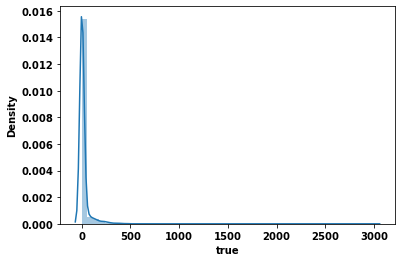

In [264]:
sns.distplot(error['true'])

<AxesSubplot:xlabel='negative', ylabel='Density'>

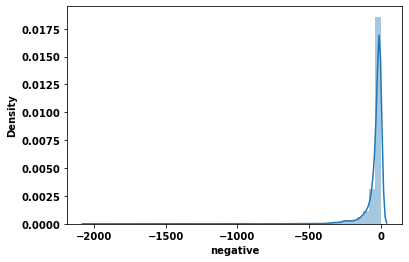

In [266]:
sns.distplot(error['negative'])